In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import json

### 1. Load Amazon Review Dataset

In [ ]:
# Load the yelp reviews dataset

data_file = open("yelp_academic_dataset_review_sample.json")
data = []
for line in data_file:
  data.append(json.loads(line))
  df = pd.DataFrame(data)
data_file.close()

In [ ]:
# Print the size of the dataset
print("Dataset size:", df.shape)

Dataset size: (10000, 9)


In [ ]:
# Preview the dataset
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


### 2. Data Cleaning

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [ ]:
# Remove missing values
df.dropna(inplace=True)


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# check varibles type
df.dtypes

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

In [ ]:
# Convert timestamps to datetime objects
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

### 3. Descriptive Statistics



In [ ]:
# ID variables
ID_vals = ['user_id', 'review_id', 'business_id']

In [ ]:
# Numeric variables
num_vals = [ 'stars', 'useful', 'funny','cool']


In [ ]:
# Text variables
text_vals = ['text']

#### 3.1 ID Varaibles Descriptive Statistics

In [ ]:
for col in ID_vals:
  print(col)
  print(len(df[col].unique()),'\n')

user_id
9460 

review_id
10000 

business_id
4398 



#### 3.2 Numeric Variables Descriptive Statistics

In [ ]:
df[num_vals].describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.733900,1.118100,0.378800,0.460100
std,1.441284,2.568893,1.537578,1.752517
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,98.000000,75.000000,93.000000


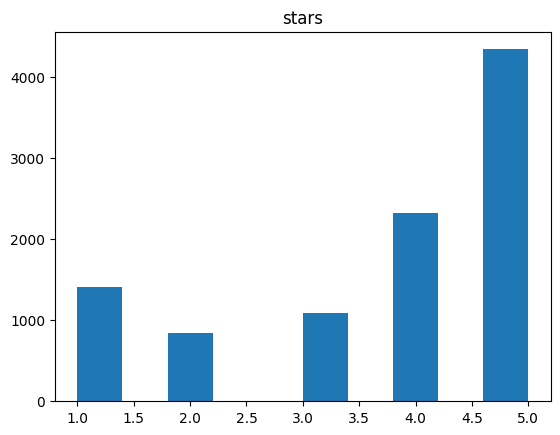

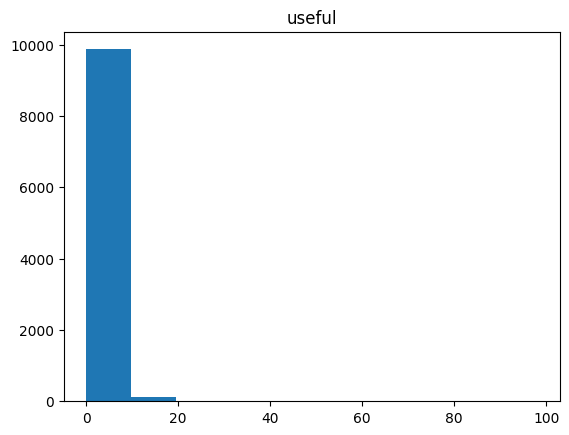

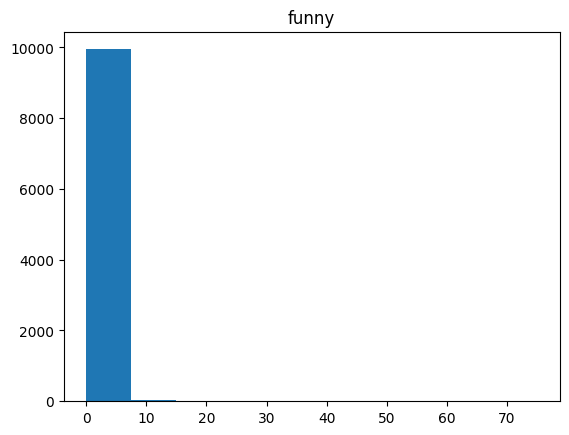

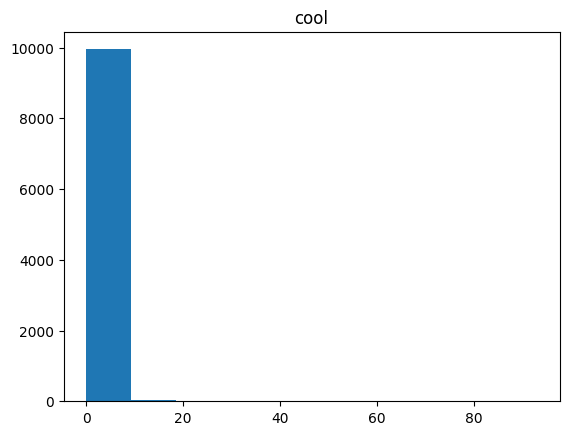

In [ ]:
for col in num_vals:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

- 'stars' has most records between 4.0 to 5.0, average of the rating is 3.7.
-  'useful','funny','cool' are extremely biased to 0, not useful

### 3. Text Analysis

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
df['review_processed'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stop_words]))


In [ ]:
# Review Length Analysis
df['review_length'] = df['review_processed'].apply(lambda x: len(x.split()))
print("Review length statistics:")
print(df['review_length'].describe())



Review length statistics:
count    10000.000000
mean        69.440700
std         63.986084
min          1.000000
25%         29.000000
50%         49.000000
75%         87.000000
max        762.000000
Name: review_length, dtype: float64


In [ ]:
# Convert 'review_processed' column to string type
df['review_processed'] = df['review_processed'].astype(str)

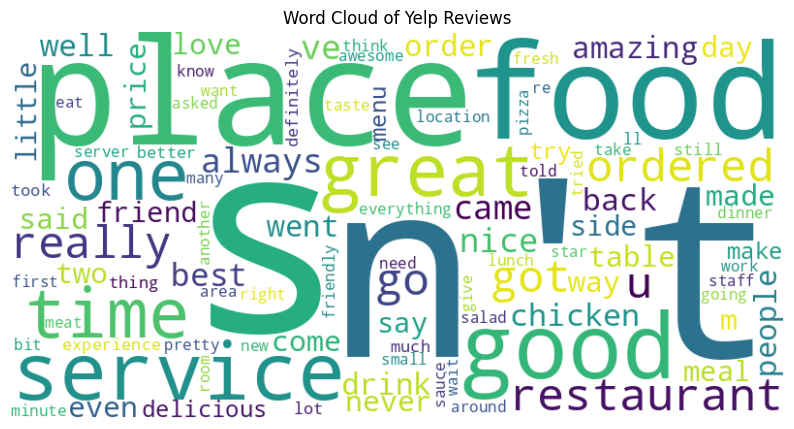

In [ ]:
# Sampled Reveiw Word Cloud
df_sample = df.sample(frac=.1)
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df_sample['review_processed']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Yelp Reviews')
plt.show()

### 4. Time Analysis

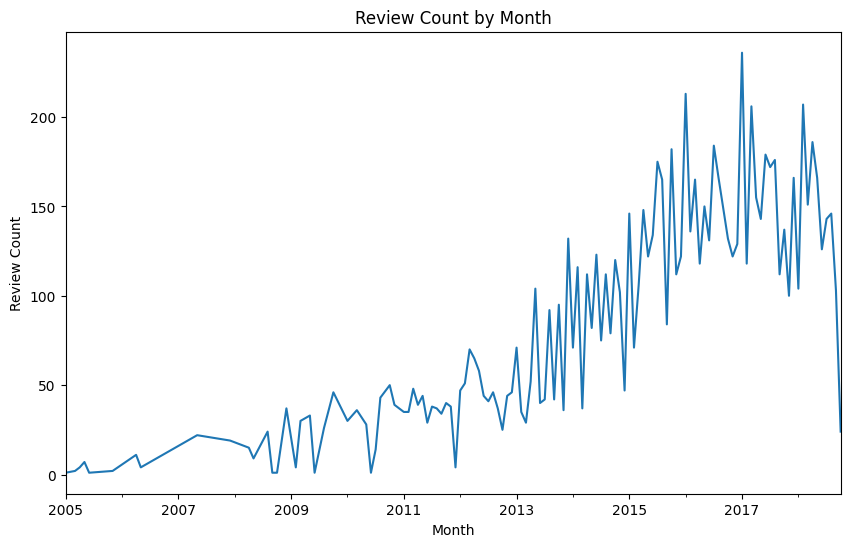

In [ ]:
df['date'] = pd.to_datetime(df['date'])
review_counts_by_month = df.groupby(df['date'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
review_counts_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.title('Review Count by Month')
plt.show()

Review counts genearally increase over year. It fluctuates within the year.

### 5. User and Item Analysis

In [ ]:
user_agg=df.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [ ]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id                date                      \
                           count                 min                 max   
user_id                                                                    
CxDOIDnH8gp9KXzpBHJYXw        10 2010-01-08 19:31:42 2018-07-07 21:26:22   
ELcQDlf69kb-ihJfxZyL0A         7 2013-02-21 22:08:58 2016-06-21 17:16:50   
rCWrxuRC8_pfagpchtHp6A         7 2010-07-08 03:56:24 2015-01-04 06:18:47   
U4INQZOPSUaj8hMjLlZ3KA         5 2009-10-15 01:13:24 2017-03-27 10:56:06   
4wp4XI9AxKNqJima-xahlg         5 2011-03-21 02:07:43 2013-08-06 13:22:42   
HLaSqQMDVvlcFPGJL_kGCA         5 2005-03-03 19:49:39 2005-11-01 18:50:50   
kjeX2RXvW7RhBbD2QLd5jA         4 2011-03-20 18:45:23 2014-10-27 19:25:43   
hWDybu_KvYLSdEFzGrniTw         4 2012-03-01 15:09:45 2017-04-19 14:19:30   
AvC5XQAElcGAAn_Wr5auEg         4 2012-03-30 12:51:28 2012-12-04 14:27:31   
xSiaSnRfXBVZstO9LBNRaA         4 2015-07-03 20:22:49 2015-07-03 21:58:04   

                       useful funny cool     stars  
                          sum   sum  sum      mean  
user_id                                             
CxDOIDnH8gp9KXzpBHJYXw     25    12   20  3.200000  
ELcQDlf69kb-ihJfxZyL0A     16     7    9  2.285714  
rCWrxuRC8_pfagpchtHp6A     73    57   63  4.000000  
U4INQZOPSUaj8hMjLlZ3KA     23     9   16  4.600000  
4wp4XI9AxKNqJima-xahlg     29    11   15  3.200000  
HLaSqQMDVvlcFPGJL_kGCA      7     6    0  2.600000  
kjeX2RXvW7RhBbD2QLd5jA     14     9    4  3.500000  
hWDybu_KvYLSdEFzGrniTw     24    20   18  2.750000  
AvC5XQAElcGAAn_Wr5auEg      7     1    1  3.750000  
xSiaSnRfXBVZstO9LBNRaA      1     0    0  3.750000

In [ ]:
# Item Analysis
item_agg=df.groupby('business_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [ ]:
item_agg=item_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Business in Yelp")
item_agg.head(10)

          Top 10 Business in Yelp


review_id                date                      \
                           count                 min                 max   
business_id                                                                
XZbuPXdyA0ZtTu3AzqtQhg        77 2005-06-07 00:25:54 2018-09-25 13:57:02   
rcaPajgKOJC2vo_l3xa42A        61 2006-04-20 20:06:16 2018-08-04 21:24:32   
u_vPjx925UPEG9DFOAAvFQ        56 2008-08-18 21:24:52 2018-09-25 04:25:31   
yNPh5SO-7wr8HPpVCDPbXQ        38 2011-03-20 00:22:46 2018-08-23 22:20:48   
0FUtlsQrJI7LhqDPxLumEw        38 2007-12-16 07:55:16 2018-06-08 23:25:30   
hihud--QRriCYZw1zZvW4g        34 2014-08-11 03:00:39 2018-09-25 15:40:01   
p0iEUamJVp_QpaheE-Nz_g        34 2010-05-14 14:51:58 2018-09-03 02:59:22   
Jt28TYWanzKrJYYr0Tf1MQ        32 2010-11-22 03:34:23 2018-04-15 19:38:25   
IhNASEZ3XnBHmuuVnWdIwA        31 2015-07-16 06:46:29 2018-08-23 22:22:41   
7sb2FYLS2sejZKxRYF9mtg        29 2013-08-15 18:27:33 2018-06-26 17:12:55   

                       useful funny cool     stars  
                          sum   sum  sum      mean  
business_id                                         
XZbuPXdyA0ZtTu3AzqtQhg     53    21   20  3.935065  
rcaPajgKOJC2vo_l3xa42A     74    37   40  4.229508  
u_vPjx925UPEG9DFOAAvFQ     78    36   18  2.535714  
yNPh5SO-7wr8HPpVCDPbXQ     31     6    5  3.605263  
0FUtlsQrJI7LhqDPxLumEw     40     5    5  4.078947  
hihud--QRriCYZw1zZvW4g      7     3    6  4.323529  
p0iEUamJVp_QpaheE-Nz_g     30     2    7  3.294118  
Jt28TYWanzKrJYYr0Tf1MQ      8     1    2  3.343750  
IhNASEZ3XnBHmuuVnWdIwA     10     5   10  4.935484  
7sb2FYLS2sejZKxRYF9mtg     47    13   22  4.379310

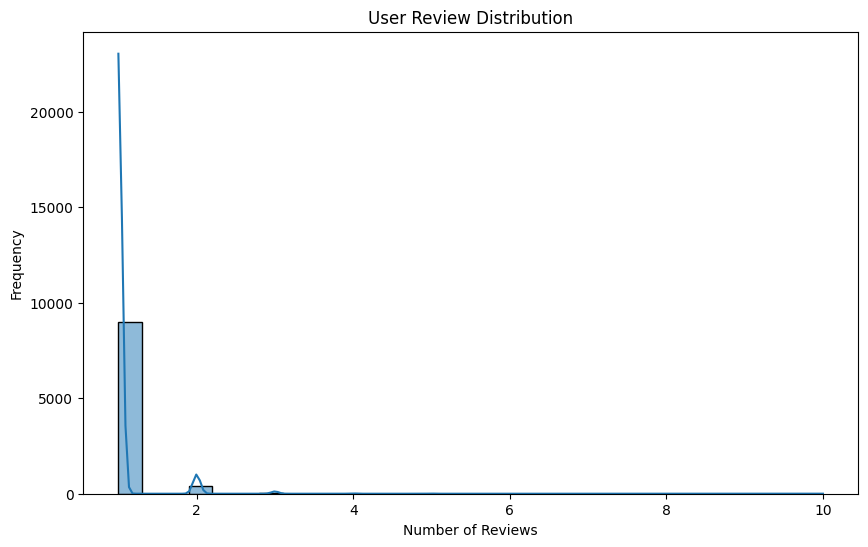

In [ ]:
# User Item Interaction Patterns
user_item_counts = df.groupby('user_id')['business_id'].count()
plt.figure(figsize=(10, 6))
sns.histplot(user_item_counts, bins=30, kde=True)
plt.title("User Review Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

In [ ]:
user_item_counts.describe()

count    9460.000000
mean        1.057082
std         0.292120
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: business_id, dtype: float64

<ipython-input-63-25671764b214>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
<ipython-input-63-25671764b214>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
<ipython-input-63-25671764b214>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

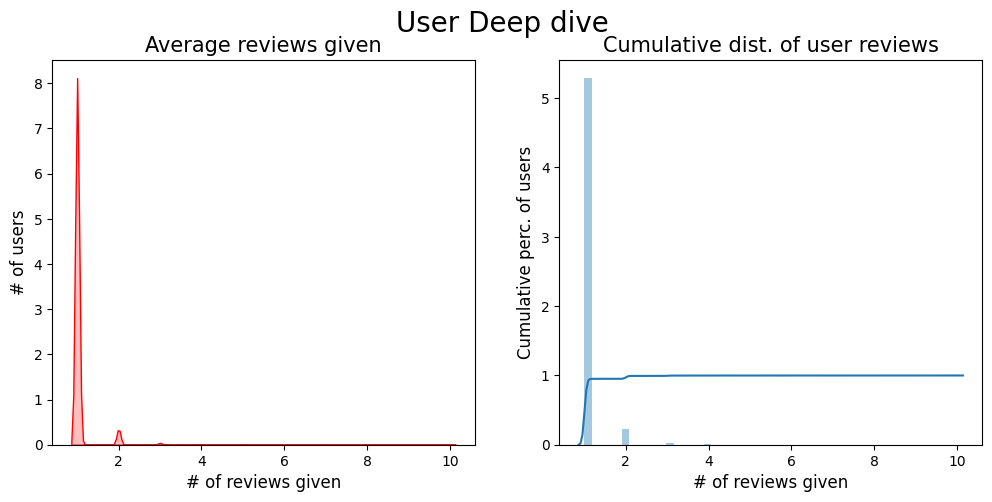

In [ ]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)

plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("Average reviews given",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()


### 6. User Item Matrix Sparsity Analysis

In [ ]:
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

# Create a user-item matrix
user_item_matrix = pd.pivot_table(df, values='stars', index='user_id', columns='business_id', fill_value=0)


In [ ]:
# Convert the user-item matrix to a sparse matrix
sparse_matrix = csr_matrix(user_item_matrix.values)



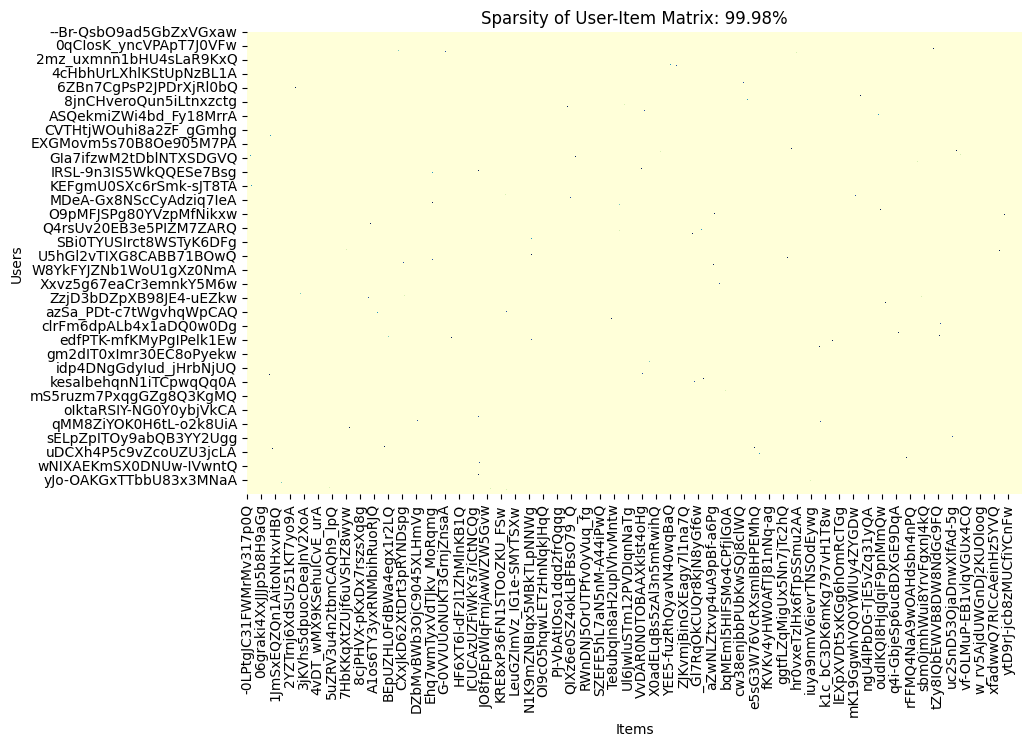

In [ ]:
# Calculate sparsity
sparsity = 1.0 - np.count_nonzero(user_item_matrix) / np.prod(user_item_matrix.shape)

# Create a heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(user_item_matrix, cmap="YlGnBu", cbar=False)
plt.title(f"Sparsity of User-Item Matrix: {sparsity:.2%}")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()

### Conlusion:
Yelp Review Sample Dataset includes 9460 users who gave out 10000 reviews on 4398 restaurants.
The dataset consists of 9 variables, which can be categorized into ID, numeric, text and timestamp variables.

Based on user and item analysis, in the sample dataset, 75% users gave out only 1 review / interacted with 1 business. Sparsity is calculated as the percentage of missing values (zeros) in the user-item matrix. The sparsity value of 99.98% indicates that the user-item matrix is highly sparse, meaning that the vast majority of entries in the matrix are missing or zeros. This level of sparsity highlights the challenges in making accurate recommendations due to the limited available interactions between users and items.
